In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [63]:
iris = load_iris()

X = iris.data
y = iris.target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [55]:
#uso 3 come numero di fold
scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
print(scores)

[0.98039216 0.96078431 0.97916667]


In [56]:
print(scores.mean())

0.9734477124183006


In [57]:
#cerco un valore ottimale dell'iperparametro C
import numpy

k_range = list(numpy.arange(0.1, 1.0, 0.1))
k_scores = []
for k in k_range:
    model = SVC(gamma='scale', C=k)
    scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9133986928104575, 0.9473039215686274, 0.9538398692810457, 0.9538398692810457, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824]


Text(0, 0.5, 'Accuratezza della cross-validation')

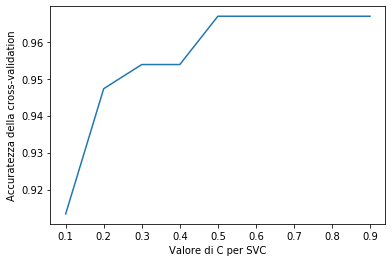

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizzo mediante un grafico
plt.plot(k_range, k_scores)
plt.xlabel('Valore di C per SVC')
plt.ylabel('Accuratezza della cross-validation')

In [59]:
#Noto che per C=0.8 ho il valore di accuratezza migliore

In [60]:
model = SVC(gamma='scale', C=0.8)
print(cross_val_score(model, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [61]:
#Trovo per valore ottimale di sigma
tipi = ['linear', 'poly', 'rbf', 'sigmoid']
k_scores = []
for k in range(0,4):
    model = SVC(gamma='scale', kernel=tipi[k])
    scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9799836601307189, 0.9673202614379085, 0.9734477124183006, 0.059640522875817]


Text(0, 0.5, 'Accuratezza della cross-validation')

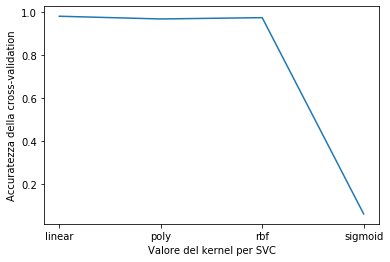

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizzo mediante un grafico
plt.plot(tipi, k_scores)
plt.xlabel('Valore del kernel per SVC')
plt.ylabel('Accuratezza della cross-validation')

In [65]:
#uso i valori degli iperparametri trovati mediante la cross validation
model = SVC(gamma='scale', C=0.5, kernel='linear')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
model.fit(X_train, y_train)
y_predizione = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_predizione))

0.9473684210526315
